Policy measures are tracked by [Oxford Covid-19 Government Response Tracker (OxCGRT)](https://github.com/OxCGRT/covid-policy-tracker).

In [2]:
import os
os.chdir("../")
from pprint import pprint
import covsirphy as cs
import seaborn as sns
sns.set()
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 11, 8
plt.style.use('fivethirtyeight')
plt.rcParams['figure.facecolor'] = 'white'
plt.rcParams['axes.facecolor']='white'
plt.rcParams['savefig.facecolor']='white'
cs.__version__

In [4]:
data_loader = cs.DataLoader("input")
jhu_data = data_loader.jhu(verbose=False)
population_data = data_loader.population(verbose=False)

# Government Response Tracker (OxCGRT)
oxcgrt_data = data_loader.oxcgrt(verbose=False)
print(oxcgrt_data.citation)

Retrieving COVID-19 dataset in Japan from https://github.com/lisphilar/covid19-sir/data/japan
(Secondary source) Guidotti, E., Ardia, D., (2020), "COVID-19 Data Hub", Journal of Open Source Software 5(51):2376, doi: 10.21105/joss.02376.


## Class for policy measure analysis
We will `PolicyMeasures` class to find relationship of policy measures and parameter values of SIR-derived ODE models.

In [5]:
# Create analyser with tau value 360 [min] (can be changed)
analyser = cs.PolicyMeasures(jhu_data, population_data, oxcgrt_data, tau=360)
# The number of registerd countries
len(analyser.countries)


196

In [6]:
# We can get Scenario instance for detailed scenario analysis
type(analyser.scenario("Japan"))

covsirphy.analysis.scenario.Scenario

## Set phases with S-R trend analysis
We will perform S-R trend analysis to set phases in all countries. Countries which do not have **17th phases** will be un-registered for the next analysis. This number will be adjusted for your analysis.

In [7]:
# Show the number of phases of all countries
analyser.trend()
pprint(analyser.phase_len(), compact=True)

{2: ['Solomon Islands', 'Holy See', 'Laos'],
 3: ['Saint Kitts and Nevis', 'Timor-Leste'],
 4: ['Tanzania', 'Dominica'],
 5: ['Grenada', 'Brunei', 'Equatorial Guinea', 'Fiji'],
 6: ['Antigua and Barbuda', 'Saint Lucia'],
 7: ['Saint Vincent and the Grenadines', 'Mauritius', 'Cambodia'],
 8: ['Bahamas', 'Sao Tome and Principe', 'Northern Mariana Islands',
     'Madagascar', 'Kyrgyzstan', 'Trinidad and Tobago', 'Seychelles'],
 9: ['Oman', 'Vietnam', 'Gambia', 'Papua New Guinea', 'Australia', 'Ghana',
     'Jamaica', 'Uzbekistan', 'Philippines', 'Liechtenstein', 'Bolivia',
     'Malawi'],
 10: ['Rwanda', 'Chile', 'Bermuda', 'Bahrain', 'Suriname', 'Kenya', 'Benin',
      'South Africa', 'Virgin Islands, U.S.', 'Monaco', 'Lesotho', 'Honduras',
      'Venezuela', 'Cape Verde', 'Guam', 'Zimbabwe', 'Eritrea', 'Kuwait',
      'Djibouti', 'Zambia', 'Mozambique', 'Iraq', 'Burundi', 'Bhutan',
      'Ethiopia', 'Mongolia', 'Guatemala', 'India', 'Guyana', 'Singapore',
      'El Salvador', 'Angola', 

In [8]:
# Set phases with S-R trend analysis
analyser.trend(min_len=15)
# The number of countries
len(analyser.countries)

8

In [9]:
phase_len_dict = analyser.phase_len()
pprint(phase_len_dict, compact=True)

{17: ['Netherlands', 'Norway', 'United Kingdom', 'Italy', 'Germany', 'Finland',
      'Switzerland'],
 18: ['Portugal']}


In [10]:
# Here, only show the countries which have the most phases
countries_show = max(phase_len_dict.items(), key=lambda x: x[0])[1]
# Show summary
analyser.summary(countries=countries_show)

Type      Start        End  Population
Country  Phase                                        
Portugal 0th    Past  14Mar2020  03Apr2020    10283822
         1st    Past  04Apr2020  22Apr2020    10283822
         2nd    Past  23Apr2020  01Jun2020    10283822
         3rd    Past  02Jun2020  02Jul2020    10283822
         4th    Past  03Jul2020  11Aug2020    10283822
         5th    Past  12Aug2020  11Sep2020    10283822
         6th    Past  12Sep2020  30Sep2020    10283822
         7th    Past  01Oct2020  13Oct2020    10283822
         8th    Past  14Oct2020  21Oct2020    10283822
         9th    Past  22Oct2020  28Oct2020    10283822
         10th   Past  29Oct2020  04Nov2020    10283822
         11th   Past  05Nov2020  14Nov2020    10283822
         12th   Past  15Nov2020  25Nov2020    10283822
         13th   Past  26Nov2020  02Dec2020    10283822
         14th   Past  03Dec2020  09Dec2020    10283822
         15th   Past  10Dec2020  15Dec2020    10283822
         16th   Past  16Dec2020  21Dec2020    10283822
         17th   Past  22Dec2020  29Dec2020    10283822

## Parameter estimation
we will estimate the parameter values with SIR-derived ODE models in each country.

In [11]:
# Parameter estimation with SIR-F model
analyser.estimate(cs.SIRF, timeout=10)


<SIR-F model: parameter estimation>
Running optimization with 4 CPUs...
	NOR,  1st phase (24Mar2020 - 04Apr2020): finished   75 trials in 0 min 10 sec
	FIN,  1st phase (05Apr2020 - 19Apr2020): finished   83 trials in 0 min 10 sec
	GBR,  5th phase (16Sep2020 - 02Oct2020): finished   90 trials in 0 min 10 sec
	NOR, 15th phase (15Dec2020 - 21Dec2020): finished   95 trials in 0 min 10 sec
	ITA,  6th phase (01Oct2020 - 14Oct2020): finished  103 trials in 0 min 10 sec
	NLD,  8th phase (15Oct2020 - 24Oct2020): finished  104 trials in 0 min 10 sec
	PRT, 11th phase (05Nov2020 - 14Nov2020): finished   98 trials in 0 min 10 sec
	GBR,  6th phase (03Oct2020 - 12Oct2020): finished   97 trials in 0 min 10 sec
	PRT,  7th phase (01Oct2020 - 13Oct2020): finished   79 trials in 0 min 10 sec
	NOR,  9th phase (29Oct2020 - 03Nov2020): finished   77 trials in 0 min 10 sec
	GBR, 13th phase (25Nov2020 - 02Dec2020): finished   76 trials in 0 min 10 sec
	ITA,  7th phase (15Oct2020 - 21Oct2020): finished   74 tr

In [12]:
# Show summary
analyser.summary(countries=countries_show)

Type      Start        End  Population    ODE     Rt  \
Country  Phase                                                         
Portugal 0th    Past  14Mar2020  03Apr2020    10283822  SIR-F  99.46   
         1st    Past  04Apr2020  22Apr2020    10283822  SIR-F   6.82   
         2nd    Past  23Apr2020  01Jun2020    10283822  SIR-F   1.19   
         3rd    Past  02Jun2020  02Jul2020    10283822  SIR-F   1.09   
         4th    Past  03Jul2020  11Aug2020    10283822  SIR-F   0.51   
         5th    Past  12Aug2020  11Sep2020    10283822  SIR-F   1.19   
         6th    Past  12Sep2020  30Sep2020    10283822  SIR-F   2.08   
         7th    Past  01Oct2020  13Oct2020    10283822  SIR-F   1.61   
         8th    Past  14Oct2020  21Oct2020    10283822  SIR-F   1.39   
         9th    Past  22Oct2020  28Oct2020    10283822  SIR-F   1.64   
         10th   Past  29Oct2020  04Nov2020    10283822  SIR-F   1.56   
         11th   Past  05Nov2020  14Nov2020    10283822  SIR-F   1.58   
         12th   Past  15Nov2020  25Nov2020    10283822  SIR-F   0.92   
         13th   Past  26Nov2020  02Dec2020    10283822      -      -   
         14th   Past  03Dec2020  09Dec2020    10283822      -      -   
         15th   Past  10Dec2020  15Dec2020    10283822      -      -   
         16th   Past  16Dec2020  21Dec2020    10283822      -      -   
         17th   Past  22Dec2020  29Dec2020    10283822      -      -   

                     theta        kappa         rho        sigma  tau  \
Country  Phase                                                          
Portugal 0th     0.0404589  0.000183921   0.0423652  0.000224807  360   
         1st      0.137787  0.000450842   0.0100539  0.000819638  360   
         2nd      0.129595  0.000545034  0.00438726   0.00267713  360   
         3rd      0.223018  0.000691666  0.00722356   0.00444707  360   
         4th      0.281139  0.000545034  0.00425864   0.00547839  360   
         5th      0.157262  0.000400875    0.004251   0.00260203  360   
         6th      0.137787  0.000450842  0.00893686   0.00325303  360   
         7th     0.0273973   0.00181889  0.00959166   0.00396835  360   
         8th     0.0273973   0.00181889   0.0148859   0.00860955  360   
         9th     0.0273973   0.00181889   0.0180317   0.00889327  360   
         10th    0.0273973   0.00181889   0.0189556    0.0100001  360   
         11th   0.00323185  0.000309142   0.0197602     0.012141  360   
         12th    0.0273973   0.00181889   0.0200534    0.0193053  360   
         13th            -            -           -            -    -   
         14th            -            -           -            -    -   
         15th            -            -           -            -    -   
         16th            -            -           -            -    -   
         17th            -            -           -            -    -   

               1/gamma [day] 1/alpha2 [day] alpha1 [-] 1/beta [day]     RMSLE  \
Country  Phase                                                                  
Portugal 0th            1112           1359       0.04            5  0.794115   
         1st             305            554      0.138           24  0.412732   
         2nd              93            458       0.13           56  0.594773   
         3rd              56            361      0.223           34  0.417278   
         4th              45            458      0.281           58  0.395196   
         5th              96            623      0.157           58  0.229023   
         6th              76            554      0.138           27  0.283639   
         7th              62            137      0.027           26  0.300343   
         8th              29            137      0.027           16  0.250746   
         9th              28            137      0.027           13  0.257395   
         10th             24            137      0.027           13  0.282991   
         11th             20            808      0.003       

## Compare the history of parameters
Here, compare the history of parameter values if countries.

In [13]:
# All parameter/day parameter/Rt/OxCGRT
analyser.track().head()

,Date,Country,theta,kappa,rho,sigma,alpha1 [-],1/alpha2 [day],1/beta [day],1/gamma [day],...,Cancel_events,Gatherings_restrictions,Transport_closing,Stay_home_restrictions,Internal_movement_restrictions,International_movement_restrictions,Information_campaigns,Testing_policy,Contact_tracing,Stringency_index
0,2020-03-11,Netherlands,0.0506654,0.0012724,0.0376433,0.0078018,0.051,196,6,32,...,2,0,0,1,0,0,2,1,2,18.52
1,2020-03-11,Netherlands,0.0506654,0.0012724,0.0376433,0.0078018,0.051,196,6,32,...,0,0,0,0,0,0,0,1,2,18.52
2,2020-03-11,Netherlands,0.0506654,0.0012724,0.0376433,0.0078018,0.051,196,6,32,...,0,0,0,0,0,0,0,1,2,18.52
3,2020-03-11,Netherlands,0.0506654,0.0012724,0.0376433,0.0078018,0.051,196,6,32,...,0,0,0,0,0,0,0,1,2,18.52
4,2020-03-11,Netherlands,0.0506654,0.0012724,0.0376433,0.0078018,0.051,196,6,32,...,0,0,0,0,0,0,0,1,2,18.52


### $Rt$: Reprodcution number $\mathrm{[-]}$

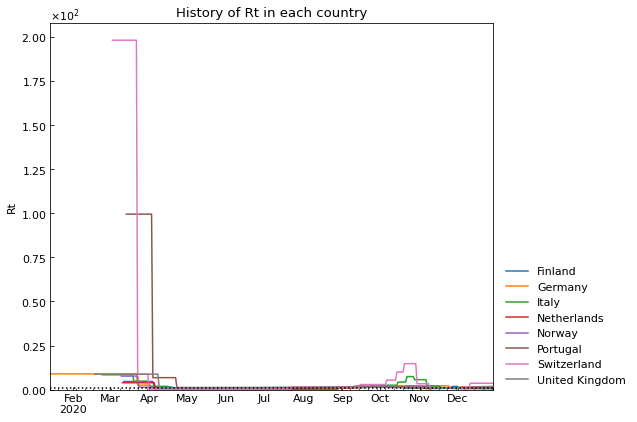

Country,Finland,Germany,Italy,Netherlands,Norway,Portugal,Switzerland,United Kingdom
Date,,,,,,,,
2020-12-25,0.56,1.34,0.71,1.23,1.09,0.92,3.66,1.89
2020-12-26,0.56,1.34,0.71,1.23,1.09,0.92,3.66,1.89
2020-12-27,0.56,1.34,0.71,1.23,1.09,0.92,3.66,1.89
2020-12-28,0.56,1.34,0.71,1.23,1.09,0.92,3.66,1.89
2020-12-29,0.56,1.34,0.71,1.23,1.09,0.92,3.66,1.89


In [14]:
analyser.history("Rt", roll_window=None).tail()

### $\rho$: Effective contact rate $\mathrm{[-]}$

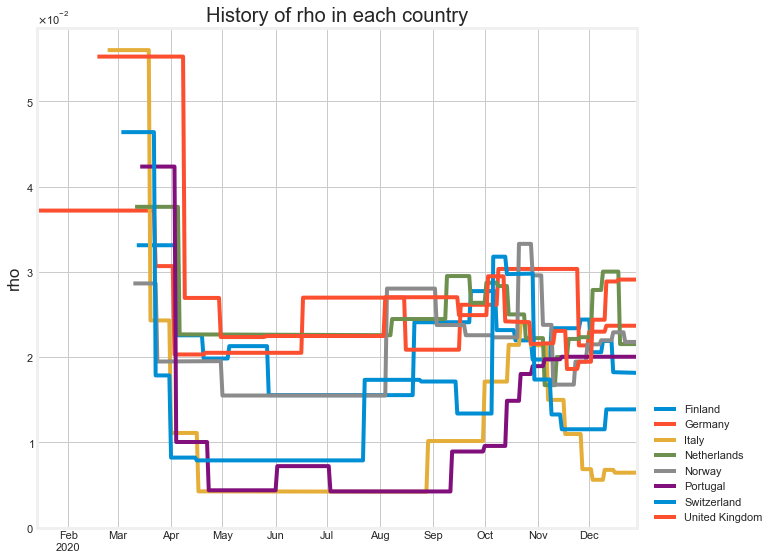

Country,Finland,Germany,Italy,Netherlands,Norway,Portugal,Switzerland,United Kingdom
Date,,,,,,,,
2020-12-25,0.018161,0.023693,0.006454,0.021542,0.021792,0.020053,0.013882,0.029109
2020-12-26,0.018161,0.023693,0.006454,0.021542,0.021792,0.020053,0.013882,0.029109
2020-12-27,0.018161,0.023693,0.006454,0.021542,0.021792,0.020053,0.013882,0.029109
2020-12-28,0.018161,0.023693,0.006454,0.021542,0.021792,0.020053,0.013882,0.029109
2020-12-29,0.018161,0.023693,0.006454,0.021542,0.021792,0.020053,0.013882,0.029109


In [74]:
analyser.history("rho", roll_window=None).tail()

### $\sigma$: Recovery rate $\mathrm{[-]}$

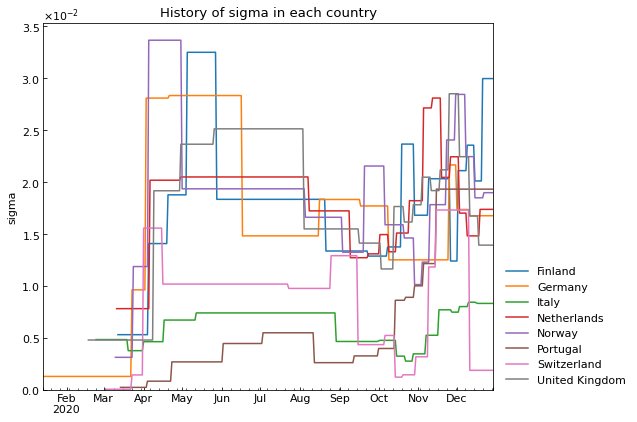

Country,Finland,Germany,Italy,Netherlands,Norway,Portugal,Switzerland,United Kingdom
Date,,,,,,,,
2020-12-25,0.029949,0.016745,0.008306,0.017359,0.018965,0.019305,0.001866,0.013915
2020-12-26,0.029949,0.016745,0.008306,0.017359,0.018965,0.019305,0.001866,0.013915
2020-12-27,0.029949,0.016745,0.008306,0.017359,0.018965,0.019305,0.001866,0.013915
2020-12-28,0.029949,0.016745,0.008306,0.017359,0.018965,0.019305,0.001866,0.013915
2020-12-29,0.029949,0.016745,0.008306,0.017359,0.018965,0.019305,0.001866,0.013915


In [16]:
analyser.history("sigma", roll_window=None).tail()

### $\kappa$: Mortality rate of infected cases $\mathrm{[-]}$

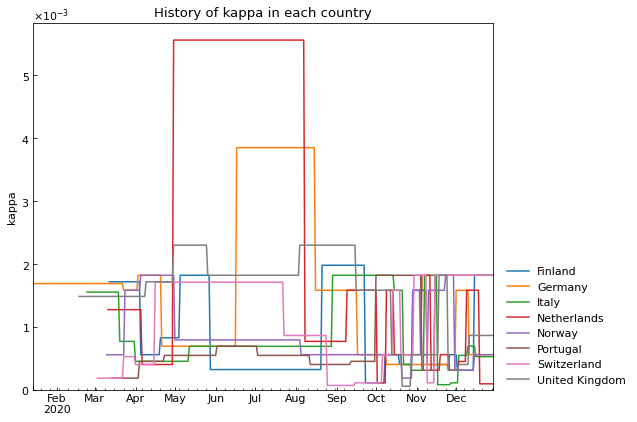

Country,Finland,Germany,Italy,Netherlands,Norway,Portugal,Switzerland,United Kingdom
Date,,,,,,,,
2020-12-25,0.001819,0.000557,0.000525,0.000093,0.000557,0.001819,0.001819,0.000862
2020-12-26,0.001819,0.000557,0.000525,0.000093,0.000557,0.001819,0.001819,0.000862
2020-12-27,0.001819,0.000557,0.000525,0.000093,0.000557,0.001819,0.001819,0.000862
2020-12-28,0.001819,0.000557,0.000525,0.000093,0.000557,0.001819,0.001819,0.000862
2020-12-29,0.001819,0.000557,0.000525,0.000093,0.000557,0.001819,0.001819,0.000862


In [17]:
analyser.history("kappa", roll_window=None).tail()

### $\theta$: Mortality rate of S$^\ast$ cases $\mathrm{[-]}$

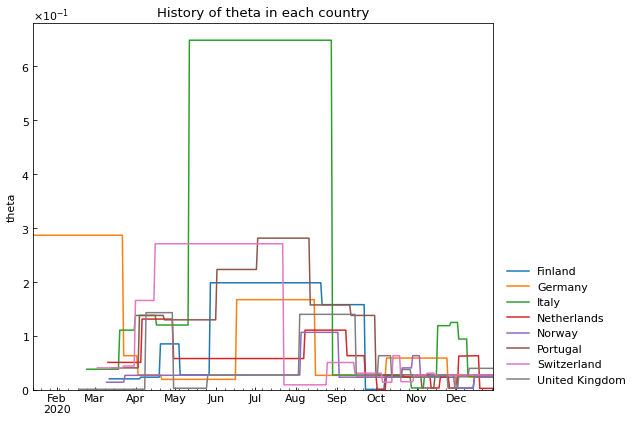

Country,Finland,Germany,Italy,Netherlands,Norway,Portugal,Switzerland,United Kingdom
Date,,,,,,,,
2020-12-25,0.027397,0.023216,0.025495,0.002473,0.023216,0.027397,0.027397,0.039596
2020-12-26,0.027397,0.023216,0.025495,0.002473,0.023216,0.027397,0.027397,0.039596
2020-12-27,0.027397,0.023216,0.025495,0.002473,0.023216,0.027397,0.027397,0.039596
2020-12-28,0.027397,0.023216,0.025495,0.002473,0.023216,0.027397,0.027397,0.039596
2020-12-29,0.027397,0.023216,0.025495,0.002473,0.023216,0.027397,0.027397,0.039596


In [18]:
analyser.history("theta", roll_window=None).tail()

## (Experimental): Relationship of OxCGRT index and parameter values
Government responses will impact on parameter values of ODE models about 14 days later. Here, we will investigate on the relationship of [stringency index (from OxCGRT)](https://github.com/OxCGRT/covid-policy-tracker/blob/master/documentation/index_methodology.md) and reproduction number/model parameters.


In [19]:
%matplotlib inline
from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd

In [20]:
df = analyser.track()
param_cols = ["Rt", *cs.SIRF.PARAMETERS]
oxcgrt_cols = oxcgrt_data.OXCGRT_VARS[:]
cols = param_cols + oxcgrt_cols
delay = 14

for col in param_cols:
    df[col] = pd.to_numeric(df[col], errors="coerce")
    df[col] = df.groupby("Country")[col].shift(0 - delay)

df = df.dropna(how="any")
df = df.loc[:, ["Date", "Country", *cols]]
track_df = df.copy()
track_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 35151 entries, 0 to 35248
Data columns (total 19 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   Date                                 35151 non-null  datetime64[ns]
 1   Country                              35151 non-null  object        
 2   Rt                                   35151 non-null  float64       
 3   theta                                35151 non-null  float64       
 4   kappa                                35151 non-null  float64       
 5   rho                                  35151 non-null  float64       
 6   sigma                                35151 non-null  float64       
 7   School_closing                       35151 non-null  int64         
 8   Workplace_closing                    35151 non-null  int64         
 9   Cancel_events                        35151 non-null  int64         
 10  Gatherings

In [21]:
# Correlation
df = track_df.copy()
df.corr().style.background_gradient(axis=None)

,Rt,theta,kappa,rho,sigma,School_closing,Workplace_closing,Cancel_events,Gatherings_restrictions,Transport_closing,Stay_home_restrictions,Internal_movement_restrictions,International_movement_restrictions,Information_campaigns,Testing_policy,Contact_tracing,Stringency_index
Rt,1.000000,-0.086550,-0.146717,0.343542,-0.269440,-0.146306,-0.197176,-0.091520,-0.182703,-0.146403,-0.190775,-0.234116,-0.168248,-0.111344,-0.215307,-0.152313,-0.179407
theta,-0.086550,1.000000,-0.077881,-0.440991,-0.284754,0.269383,-0.111958,-0.011086,-0.161101,0.354209,-0.069856,0.141586,-0.040357,-0.110830,-0.055960,0.141699,-0.128461
kappa,-0.146717,-0.077881,1.000000,0.143270,0.259047,-0.091668,0.045018,-0.025006,0.006501,-0.039735,-0.079969,-0.039118,-0.057066,-0.025405,-0.101467,0.031066,-0.056641
rho,0.343542,-0.440991,0.143270,1.000000,-0.024226,-0.435065,-0.253314,-0.486445,-0.251026,-0.334596,-0.284969,-0.344856,-0.458244,-0.236373,-0.357510,-0.212343,-0.247170
sigma,-0.269440,-0.284754,0.259047,-0.024226,1.000000,0.032797,0.311403,0.250711,0.446513,0.004566,0.033530,0.144322,0.083787,0.215513,0.135593,-0.047126,0.306282
School_closing,-0.146306,0.269383,-0.091668,-0.435065,0.032797,1.000000,0.365478,0.501329,0.149300,0.151337,0.416268,0.428979,0.177800,0.306004,0.039326,0.089852,0.417215
Workplace_closing,-0.197176,-0.111958,0.045018,-0.253314,0.311403,0.365478,1.000000,0.568648,0.753122,0.339235,0.655518,0.527040,0.204867,0.389139,0.042509,-0.158386,0.804235
Cancel_events,-0.091520,-0.011086,-0.025006,-0.486445,0.250711,0.501329,0.568648,1.000000,0.534235,0.243578,0.495730,0.513331,0.439651,0.591960,0.435319,0.145144,0.610974
Gatherings_restrictions,-0.182703,-0.161101,0.006501,-0.251026,0.446513,0.149300,0.753122,0.534235,1.000000,0.230674,0.461386,0.455733,0.234551,0.363816,0.187440,-0.069055,0.769143
Transport_closing,-0.146403,0.354209,-0.039735,-0.334596,0.004566,0.151337,0.339235,0.243578,0.230674,1.000000,0.335223,0.629687,-0.088649,0.153711,-0.023799,0.004847,0.360600


In [67]:
import seaborn as sns
sns.set()
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 8, 8
plt.style.use('fivethirtyeight')
plt.rcParams['figure.facecolor'] = 'white'
plt.rcParams['axes.facecolor']='white'
plt.rcParams['savefig.facecolor']='white'

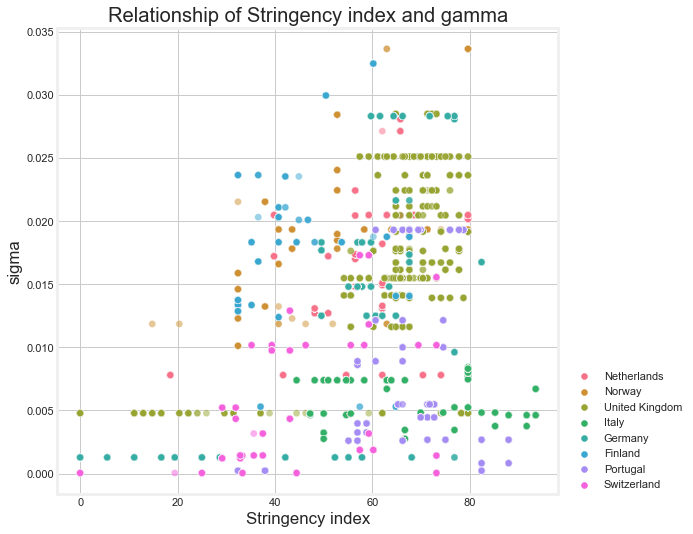

In [72]:
countries = ["Netherlands", "United Kingdom", "Italy", "Switzerland", "Germany", "Canada", "Finland"]

interest = "sigma"
title = interest
if interest == "Rt":
    title = "Reproduction number"
# df_subset = track_df[track_df["Country"] == countries[0]]
df_subset = track_df.copy()

# Scatter plot of Stringency index and interest 
sns.scatterplot(data=df_subset, x="Stringency_index", y=interest, hue="Country", legend="brief", marker="o", s=50, alpha=0.5)
bbox_to_anchor=(1.02, 0)
bbox_loc="lower left"
# plt.ylim(0, 4.2)
plt.legend(bbox_to_anchor=bbox_to_anchor, loc=bbox_loc, borderaxespad=0)
plt.title("Relationship of Stringency index and " + title)
plt.ylabel(title)
plt.xlabel("Stringency index")
plt.show()